## Required Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.animation import FuncAnimation
from IPython.core.display import display, HTML
from matplotlib.collections import PatchCollection

%matplotlib inline

## Methods

In [2]:
data = np.genfromtxt("Datos.csv", delimiter=',')

def regresion(x_array, y_array, order, n=100, min_point=0, full = False):
    """
        Returns: array of regresion values
    """
    if full:
        coeff, cov = np.polyfit(x_array, y_array, order, cov = True)
        R = cov/(np.std(x_array)*np.std(y_array))
    else:
        coeff = np.polyfit(x_array, y_array, order)
        
    x = np.linspace(min_point, max(x_array)*1.1, n)
    y = np.zeros_like(x)
    for i in range(order+1):
        y += coeff[i]*x**(order-i)
    if full:
        return x, y, coeff, np.sum(R**2)
    else:
        return x, y, coeff

def equation_text(coefficients, variable):
    """
        Returns: the equation of regresion as text
    """
    text = []
    
    i = len(coefficients)-1
    for (j, cons) in enumerate(coefficients):
        if j == i:
            text.append("$%.3f$"%cons)
        elif i-j == 1:
            text.append("$%.3f$"%(cons) + variable)
        else:            
            text.append("$%.3f$"%cons + variable+"$^%d$"%(i-j))
        
    final = ""
    for (i, element) in enumerate(text):
        if i != 0:
            if element[1] == "-":
                final += element
            else:
                final += "$+$"+element
        else:
            final += element
    
    return final

def animation(x_array, y_array, order, labels, variable, text_coordinates, name, min_point=0):
    """
        Saves and displays a gif animation
    """
    def update(pos):
        line.set_data(x_array[:pos], y_array[:pos])
        return line,
    
    x_fit, y_fit, coeff = regresion(x_array, y_array, order, min_point = min_point)
    text = equation_text(coeff, variable)
    
    fig, ax = plt.subplots(figsize=(10,5))

    N = len(x_array)
    
    ax.plot(x_array, y_array, "o", color = "r", alpha = 0.3)
    ax.plot(x_fit, y_fit)
    ax.text(text_coordinates[0], text_coordinates[1], "$f($%s$) = $%s"%(variable, text))
    line, = ax.plot([], [], "-o", color = "r")
    
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.grid()     

    ani = FuncAnimation(fig, update, np.arange(1, N+1))

    fps = N/5
    ani.save(name, writer='imagemagick', fps = fps)
    
    display(HTML('<img src="%s">'%name))
    plt.close()
    
def video():
    html = """
            <video width="576" height="320" controls>
              <source src="video.mp4" type="video/mp4">
            </video>
            """
    display(HTML(html))

## Constants

In [3]:
COMPOUND_NAME = 0
MOLECULAR_WEIGHT = 1
REAL_MASS = 2
MOL = 3
MASS_CHANGE = 4
MASS_CHANGE_MOL = 5
MOLAR_MAGNETIC_SUSCEPTIBILITY = 6
SPINS = 7

names = ["FeCl$_3$ · 6H$_2$O", "MnSO$_4$ · H$_2$O"
         , "Fe$_2$(SO$_4$)$_3$ · 9H$_2$O", "CoCl$_2$ · 6H$_2$O"
         , "KCr(SO$_4$)$_2$ · 12H$_2$O", 'NiSO$_4$ · 6H$_2$O'
         , "CuSO$_4$ · 5H$_2$O", "Fe$_4$[Fe(CN)$_6$]","(NH$_4$)$_2$Cr$_2$O$_7$", "CuCl"]

<hr style="height:3px">
# Force due to a magnet
<center>
<img src="Griffiths.png" width = 700>
</center>
Griffiths, D. J. *Introduction to electrodynamics*, 4th ed.; Addison-Wesley Educational Publishers: United States, 2013; p 266.

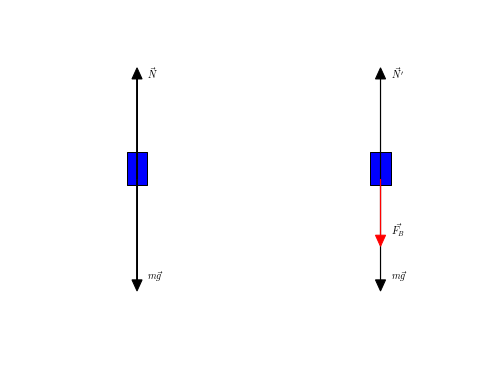

In [4]:
f, axes = plt.subplots(1,2, figsize=(8, 6))

for (i, ax) in enumerate(axes):
    ax.arrow(0, 0, 0, 0.9, head_width=0.05, head_length=0.1, fc='k', ec='k')
    ax.arrow(0, 0, 0, -0.9, head_width=0.05, head_length=0.1, fc='k', ec='k')
    if i != 0:
        ax.arrow(0, 0, 0, -0.5, head_width=0.05, head_length=0.1, fc='r', ec='r')
        ax.text(0.05, -0.5, r"$\vec{F_B}$")
        ax.text(0.05, 0.9, r"$\vec{N'}$")
        
    else:
        ax.text(0.05, 0.9, r"$\vec{N}$")
        
    ax.text(0.05, -0.9, r"$m\vec{g}$")
    
    
    rect = mpatches.Rectangle([-0.1/2,-0.1/2], 0.1, 0.3)
    collection = PatchCollection([rect])
    ax.add_collection(collection)
    
    ax.set_xlim(-0.5, 0.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_axis_off()
plt.show()

A partir de las condiciones de equílibrio:
$$
\vec{N'} + \vec{F_b} + m\vec{g} = 0 
$$

de donde se obtiene:
$$
\begin{matrix}
N' = m_bg = F_b - mg \\
F_b = (m_b - m)g = -\Delta mg
\end{matrix}
$$

# Force and N

Sea $N$ el número de electrones desapareados, el momento magnetico es:
$$\vec{\mu} = \pm \sqrt{N(N+2)}\mu_B\hat{B}$$

La fuerza experimentada es entonces:
$$\vec{F} = \vec{\nabla}\left(\vec{\mu} \cdot \vec{B}\right)$$

<hr style="height:1px">
<img src="Proportionality.png">
<hr style="height:1px">

$$F \propto N(N+2)$$
<h1><center> ? </center></h1>

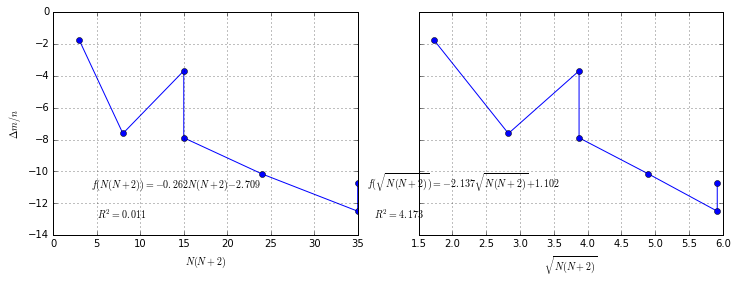

In [10]:
y = data[:, MASS_CHANGE_MOL]
x = data[:, SPINS]*(data[:, SPINS]+2)

x = x[:-3]
y = y[:-3]
xs = [x, np.sqrt(x)]



labels = ["$N(N+2)$", "$\sqrt{N(N+2)}$"]

fig, axis = plt.subplots(1,2, figsize=(12, 4), sharey=True)

for (x, ax, label) in zip(xs, axis, labels):
    ax.plot(x, y, "-o")

    x_fit, y_fit, coeff, R = regresion(x, y, 1, min_point=-14, full = True)
    text = equation_text(coeff, label)
    
    ax.text(max(x)/8, -11, "$f($%s$) = $%s"%(label, text))
    
    ax.text(max(x)/7, -13, "$R^2 = %.3f$"%R)
    ax.grid()
    ax.set_xlabel(label)
axis[0].set_ylabel("$\Delta m/n$")
plt.show()

# Molar magnetic susceptibility vs Force

# The problem

## Fuerza de Lorentz
$$ \vec{F} = q(\vec{E} + \vec{v}\times\vec{B})$$

Para simular el campo de un imán según el modelo de Gilbert:
$$ \nabla^2 \theta = 0 $$
donde $\theta = f(x, y)$

In [6]:
y = data[:-3, MASS_CHANGE_MOL][::-1]
x = data[:-3, MOLAR_MAGNETIC_SUSCEPTIBILITY][::-1]

animation(x, y, 1, ["$\chi_M$", "$\Delta m/n$"], "$\chi_M$", [9, -7], "XvsF.gif", min_point=0)

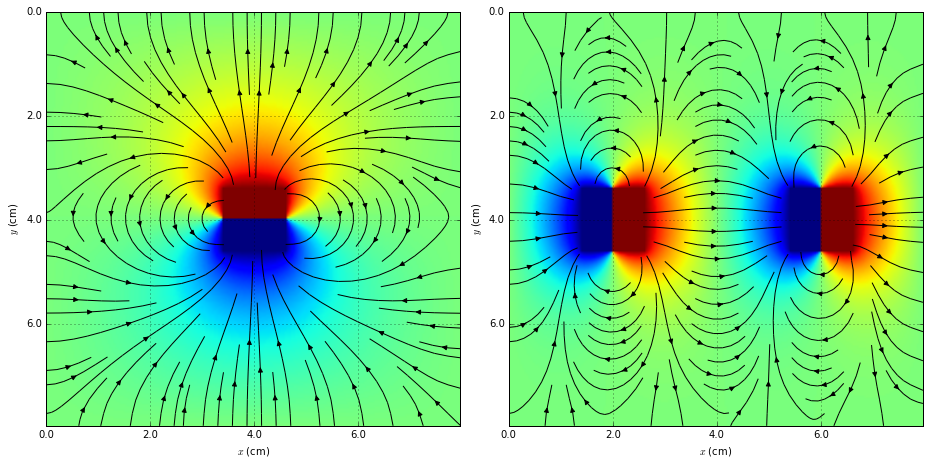

In [7]:
simulated = np.genfromtxt('simulated.dat')

size = int(np.sqrt(simulated.shape[0]/2))

first = simulated[:size**2]
second = simulated[size**2:]

magnets = [first, second]

fig, axis = plt.subplots(1, 2, figsize=(13, 9))

for (magnet, ax) in zip(magnets, axis):
    potential = magnet.reshape(size, size)

    xi, yi = np.linspace(0, size-1, size), np.linspace(0, size-1, size)
    xi, yi = np.meshgrid(xi, yi)

    dx, dy = np.gradient(-potential)

    ax.imshow(potential)
    ax.streamplot(xi, yi, dy, dx, color='black')

    ax.set_xlim(0, size-1)
    ax.set_ylim(size-1, 0)

    labels = np.arange(6, dtype=int)*10/5
    ticks = np.arange(6)*size/5
    ticks[-1] += -1

    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    ax.set_xlabel('$x$ (cm)')
    ax.set_ylabel('$y$ (cm)')
    ax.grid()
plt.tight_layout()
plt.show()

<img src="Gouy.png">

In [8]:
video()